In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
log_file_name = "part4/logs/simulated.csv"
df = pd.read_csv(log_file_name)
df

,unix_time,light,temp,humid,weight,smoist,level,level_raw,light_raw_1,light_raw_2,...,humid_raw_1,humid_raw_2,weight_raw_1,weight_raw_2,smoist_raw_1,smoist_raw_2,fan,wpump,led,camera
0,946685050.0,0.0,22.0,56.0,774.961212,549.0,135.000000,135.000000,0,0,...,56,56,348.732544,426.228668,549,549,False,False,0,NaN
1,946685075.0,0.0,22.0,56.0,774.957214,549.0,135.000000,135.000000,0,0,...,56,56,348.730743,426.226471,549,549,False,False,0,NaN
2,946685100.0,0.0,22.0,57.0,774.953278,549.0,135.000000,135.000000,0,0,...,57,57,348.728973,426.224304,549,549,False,False,0,NaN
3,946685125.0,0.0,22.0,57.0,774.949341,549.0,135.000000,135.000000,0,0,...,57,57,348.727203,426.222137,549,549,False,False,0,NaN
4,946685150.0,0.0,22.0,58.0,774.945557,549.0,135.000000,135.000000,0,0,...,58,58,348.725494,426.220062,549,549,False,False,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,946774515.0,0.0,24.0,90.0,837.626495,671.0,131.850006,131.850006,0,0,...,90,90,376.931915,460.694580,671,671,False,False,0,NaN
3581,946774540.0,0.0,24.0,91.0,837.625519,671.0,131.850006,131.850006,0,0,...,91,91,376.931488,460.694031,671,671,False,False,0,NaN
3582,946774565.0,0.0,24.0,91.0,837.624512,671.0,131.850006,131.850006,0,0,...,91,91,376.931030,460.693481,671,671,False,False,0,NaN
3583,946774590.0,0.0,24.0,91.0,837.623566,671.0,131.850006,131.850006,0,0,...,91,91,376.930603,460.692963,671,671,False,False,0,NaN


In [3]:
time_column = list(df['unix_time'])
start_time = time_column[0]
time_column = [(t - start_time) / 3600.0 for t in time_column]

df.insert(0, 'monitor_time_hrs', time_column)
df

,monitor_time_hrs,unix_time,light,temp,humid,weight,smoist,level,level_raw,light_raw_1,...,humid_raw_1,humid_raw_2,weight_raw_1,weight_raw_2,smoist_raw_1,smoist_raw_2,fan,wpump,led,camera
0,0.000000,946685050.0,0.0,22.0,56.0,774.961212,549.0,135.000000,135.000000,0,...,56,56,348.732544,426.228668,549,549,False,False,0,NaN
1,0.006944,946685075.0,0.0,22.0,56.0,774.957214,549.0,135.000000,135.000000,0,...,56,56,348.730743,426.226471,549,549,False,False,0,NaN
2,0.013889,946685100.0,0.0,22.0,57.0,774.953278,549.0,135.000000,135.000000,0,...,57,57,348.728973,426.224304,549,549,False,False,0,NaN
3,0.020833,946685125.0,0.0,22.0,57.0,774.949341,549.0,135.000000,135.000000,0,...,57,57,348.727203,426.222137,549,549,False,False,0,NaN
4,0.027778,946685150.0,0.0,22.0,58.0,774.945557,549.0,135.000000,135.000000,0,...,58,58,348.725494,426.220062,549,549,False,False,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,24.851389,946774515.0,0.0,24.0,90.0,837.626495,671.0,131.850006,131.850006,0,...,90,90,376.931915,460.694580,671,671,False,False,0,NaN
3581,24.858333,946774540.0,0.0,24.0,91.0,837.625519,671.0,131.850006,131.850006,0,...,91,91,376.931488,460.694031,671,671,False,False,0,NaN
3582,24.865278,946774565.0,0.0,24.0,91.0,837.624512,671.0,131.850006,131.850006,0,...,91,91,376.931030,460.693481,671,671,False,False,0,NaN
3583,24.872222,946774590.0,0.0,24.0,91.0,837.623566,671.0,131.850006,131.850006,0,...,91,91,376.930603,460.692963,671,671,False,False,0,NaN


In [41]:
# Actuators of interest for each sensor
sensors_to_actuators = {
    'light': ['led'],
    'temp': ['led', 'fan'],
    'humid': ['fan', 'wpump'],
    'weight': ['wpump'],
    'smoist': ['fan', 'wpump'],
    'level': ['wpump']
}

In [ ]:
# Plot colors for actuators
actuators_to_colors = {
    'led': 'red',
    'fan': 'green',
    'wpump': 'blue'
}

In [20]:
# Axis labels for sensors
sensors_to_labels = {
    'light': 'Light Level',
    'temp': 'Temperature (degrees Celsius)',
    'humid': 'Humidity (%)',
    'weight': 'Greenhouse Weight (g)',
    'smoist': 'Soil Moisture',
    'level': 'Reservoir Level (mL)'
}

In [31]:
# Get times when actuators were activated/deactivated
def get_actuator_activations(
    times: list[float],
    values: list) -> tuple[list[float], list[float]]:
    on = []
    off = []
    prev = None
    curr = None
    for (t, v) in zip(times, values):
        curr = v
        if prev is None:
            if curr:
                on.append(t)
            else:
                off.append(t)
        else:
            if isinstance(curr, bool):
                if prev != curr:
                    if curr:
                        on.append(t)
                    else:
                        off.append(t)
            elif isinstance(curr, int) or isinstance(curr, float):
                if (prev == 0 and curr != 0) or (prev != 0 and curr == 0):
                    if curr:
                        on.append(t)
                    else:
                        off.append(t)
        prev = curr
    return on, off

In [56]:
def plot_sensor(sensor: str, simulated, actuators=None):
    X = df['monitor_time_hrs']
    Y = df[sensor]
    if actuators is None:
        actuators = sensors_to_actuators[sensor]  # Default

    plt.plot(X, Y, 'k', linewidth=1)

    for actuator in actuators:
        on_times, off_times = get_actuator_activations(X, df[actuator])
        color = actuators_to_colors[actuator]
        first = True
        for t in on_times:
            if first:
                plt.axvline(x=t, color=color, linestyle='--', linewidth=0.5,
                        label=f'{actuator} turned on')
            else:
                plt.axvline(x=t, color=color, linestyle='--', linewidth=0.5)
            first = False
        first = True
        for t in off_times:
            if first:
                plt.axvline(x=t, color=color, linestyle=':', linewidth=0.5,
                        label=f'{actuator} turned off')
            else:
                plt.axvline(x=t, color=color, linestyle=':', linewidth=0.5)
            first = False

    plt.xlabel('Hours Passed')
    plt.ylabel(sensors_to_labels[sensor])
    if simulated:
        plt.title(f'Plot of {sensor} over time (Simulated)')
    else:
        plt.title(f'Plot of {sensor} over time (Real)')
    plt.legend()
    plt.show()



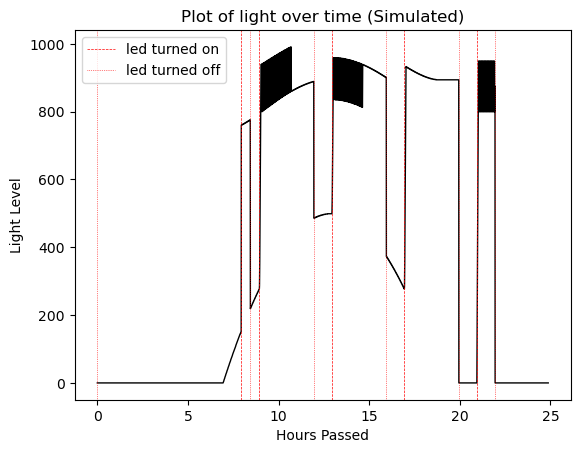

In [57]:
plot_sensor('light', simulated=True)

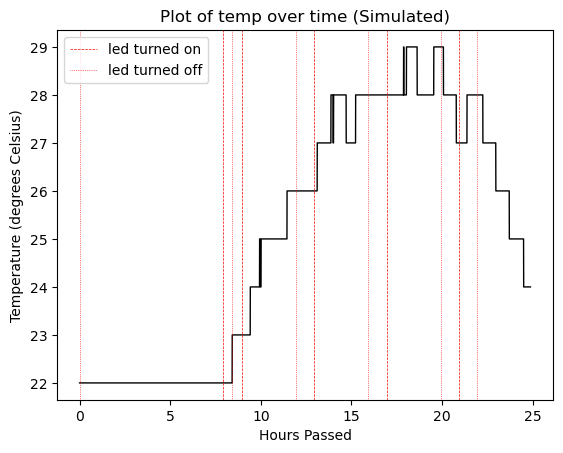

In [58]:
plot_sensor('temp', simulated=True, actuators=['led'])

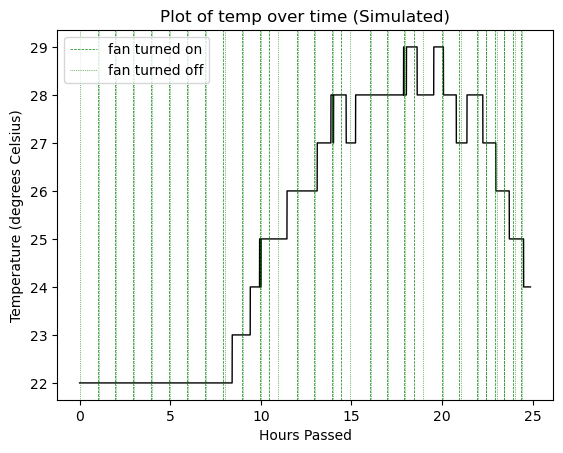

In [ ]:
plot_sensor('temp', simulated=True, actuators=['fan'])

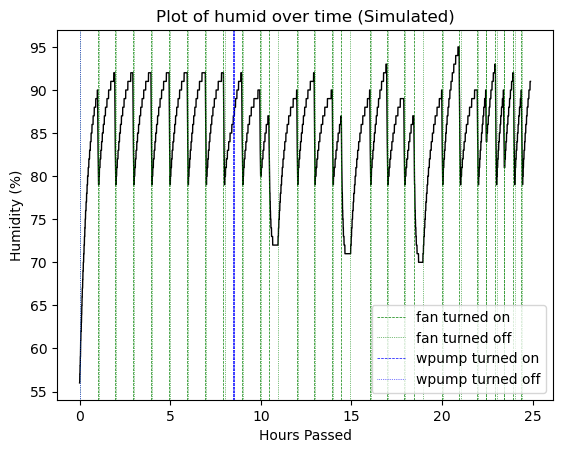

In [ ]:
plot_sensor('humid', simulated=True)

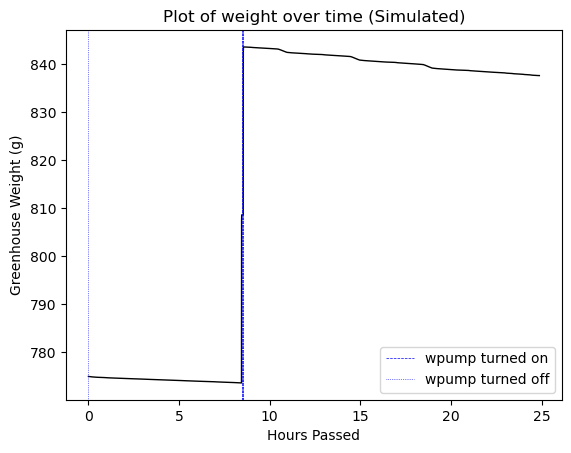

In [ ]:
plot_sensor('weight', simulated=True)

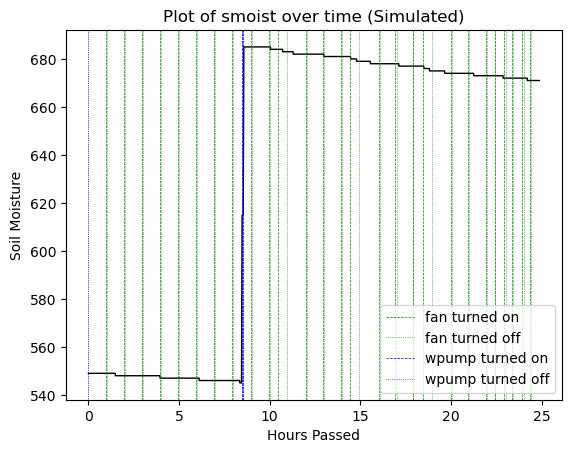

In [ ]:
plot_sensor('smoist', simulated=True)

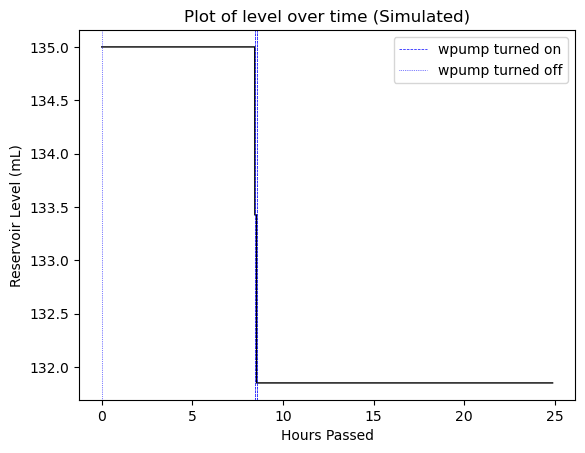

In [ ]:
plot_sensor('level', simulated=True)